In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import xmltodict

# W = 5

In [2]:
df = pd.read_excel('/Users/i.pile/Documents/supercomp/W5_points.xlsx')

In [5]:
l = list(range(2,8))

In [6]:
mu_w5_1, h_w5_1 = [], []
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    mu_w5_1.append(mu)
    h_w5_1.append(h)

In [7]:
df2_list = list(range(2,11))

In [8]:
mu_w5_2, h_w5_2 = [], []
for i in df2_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu_w5_2.append(mu)
    h_w5_2.append(h)

In [10]:
e11_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==0)]['E'].values[0]

# W = 4

In [31]:
df = pd.read_excel('/Users/i.pile/Documents/supercomp/w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('/Users/i.pile/Documents/supercomp/w4-40-equal-v4.xlsx')

In [32]:
l = list(range(2,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

In [33]:
mu_w4_1, h_w4_1 = [], []
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    mu_w4_1.append(mu)
    h_w4_1.append(h)

In [34]:
df2_list = list(range(2,30))+list(range(30,81,5))

In [35]:
mu_w4_2, h_w4_2 = [], []
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_w4_2.append(mu)
    h_w4_2.append(h)

In [37]:
e11_w4 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w4 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h_w4_1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

# W = 2

In [38]:
def En(j, n, m):
    Energy = [] 
    path = "/Users/i.pile/Documents/GitHub/diagrams2/w2/t-1/"
    for i in range(n, m, 2):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

def En1(j, n, m):
    Energy = [] 
    path = "/Users/i.pile/Documents/GitHub/diagrams2/w2/t-1/"
    for i in range(n, m, 4):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 4
    return Energy

In [42]:
#E(N, 0) : (2, 0), (4, 0), ... (78, 0)
e1 = En(0, 2, 79)

#E(N+1, 1) : (3, 1), (5, 1), ... (79, 1)
e2 = En(1, 3, 80)

#E(N-1, 1) : (1, 1), (3, 1), ... (77, 1)
e3 = En(1, 1, 78)

#E(N, N) : (1, 1), (5, 5), ... (37, 37), (39, 39)
e4 = En1(1, 1, 38)

#E(N+1, N+1) : (2, 2), (6, 6), ... (38, 38), (40 40)
e5 = En1(2, 2, 39)

#E(N+1, N-1) : (2, 0), (6, 4), ... (38, 36), (40 38)
e6 = En1(0, 2, 39)

e4.append(En(39, 39, 40)[0])
e5.append(En(40, 40, 41)[0])
e6.append(En(38, 40, 41)[0])

h_w2_1 = []
mu_w2_1 = []
for x in range(len(e1)):
    h_w2_1.append((e3[x] - e1[x]) / -2)
    mu_w2_1.append((e2[x] - e1[x]) / 2)

h_w2_2 = []
mu_w2_2 = []
for x in range(len(e4)):
    h_w2_2.append((e6[x] - e4[x]) / 2)
    mu_w2_2.append((e5[x] - e4[x]) / 2)

e10_w2 = En(0, 1, 2)[0]

h2_w2 = np.arange(h_w2_1[0], 2.7, 0.1)

def mu2(h):
    return - h + e10_w2

h3_w2 = np.arange(5.3, 8, 0.2)
def mu3(h):
    return -h - e10_w2

Text(7.2, -3.75, '$FP_2$')

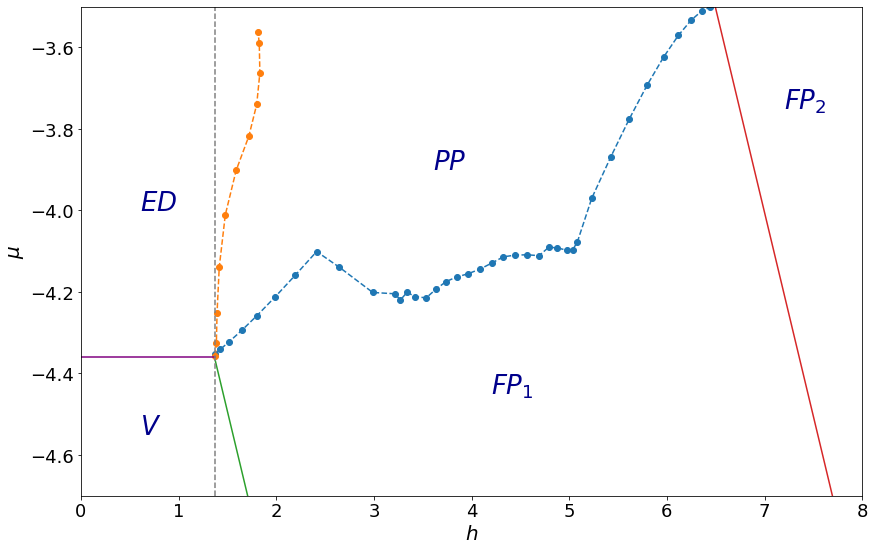

In [43]:
plt.figure(figsize=(14, 9))
xscale = 8

plt.plot(h_w2_1, mu_w2_1, 'o--', label='$PP-{FP_1}$')
plt.plot(h_w2_2, mu_w2_2, 'o--', label='$ED-PP$')
plt.plot(h2_w2, mu2(h2_w2), '-', label='$V-{FP_1}$')
plt.plot(h3_w2, mu3(h3_w2), '-', label='${FP_1}-{FP_2}$')
plt.axhline(y=(e4[0]/2), color='purple', xmax=(h_w2_1[0]/xscale),label='$ED-V$')
plt.axvline(x=h_w2_1[0],linestyle='--', color='grey')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([0, xscale, -4.7, -3.5])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(0.6, -4.0, '$ED$', fontsize=26, color='darkblue')
plt.text(0.6, -4.55, '$V$', fontsize=26, color='darkblue')
plt.text(3.6, -3.9, '$PP$', fontsize=26, color='darkblue')
plt.text(4.2, -4.45, '$FP_1$', fontsize=26, color='darkblue')
plt.text(7.2, -3.75, '$FP_2$', fontsize=26, color='darkblue')

# W = 3

In [44]:
def En(j, n, m, folder='', k = 0):
    Energy = [] 
    path = "/Users/i.pile/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + k
    return Energy

def En1(j, n, m, folder=''):
    Energy = [] 
    path = "/Users/i.pile/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 1
    return Energy

In [45]:
enn = En1(1, 1, 61, 'ED-PP/')
enn1 = En1(0, 2, 61, 'ED-PP/')

In [47]:
#E(N, 0) : (2, 0), (3, 0), ... (118, 0)

#E(N+1, 1) : (3, 1), (4, 1), ... (119, 1)

#E(N-1, 1) : (1, 1), (3, 1), ... (117, 1)

en0_w3 = En(0, 1, 119)
en1_w3 = En(1, 1, 120)
h_w3_1 = []
mu_w3_1 = []
for x in range(1, 118):
    h_w3_1.append((en1_w3[x - 1] - en0_w3[x]) / -2)
    mu_w3_1.append((en1_w3[x + 1] - en0_w3[x]) / 2)

h_w3_2 = []
mu_w3_2 = []
for x in range(0, 59):
    h_w3_2.append((enn1[x] - enn[x]) / 2)
    mu_w3_2.append((enn[x + 1] - enn[x]) / 2)

In [50]:
e10_w3 = en0_w3[0]
e11_w3 = en1_w3[0]

h2 = np.arange(h_w3_1[0], 2.7, 0.1)
def mu2(h):
    return - h + e10_w3

h3 = np.arange(5.3, 9, 0.2)
def mu3(h):
    return -h - e10_w3

# Совместим все точки в точку от W = 2

In [51]:
mu_w2 = e4[0]/2
h_w2 = h_w2_1[0]

delta_mu_w3 = mu_w2 - e11_w3/2
delta_h_w3 = h_w2 - h_w3_1[0]

delta_mu_w4 = mu_w2 - e11_w4/2
delta_h_w4 = h_w2 - h_w4_1[0]

delta_mu_w5 = mu_w2 - e11_w5/2
delta_h_w5 = h_w2 - h_w5_1[0]

# Подкрутим W=3, W=4 и W = 5

In [52]:
new_h_w3_1 = [i+delta_h_w3 for i in h_w3_1]
new_h_w3_2 = [i+delta_h_w3 for i in h_w3_2]

new_mu_w3_1 = [i+delta_mu_w3 for i in mu_w3_1]
new_mu_w3_2 = [i+delta_mu_w3 for i in mu_w3_2]


new_h_w4_1 = [i+delta_h_w4 for i in h_w4_1]
new_h_w4_2 = [i+delta_h_w4 for i in h_w4_2]

new_mu_w4_1 = [i+delta_mu_w4 for i in mu_w4_1]
new_mu_w4_2 = [i+delta_mu_w4 for i in mu_w4_2]

new_h_w5_1 = [i+delta_h_w5 for i in h_w5_1]
new_h_w5_2 = [i+delta_h_w5 for i in h_w5_2]

new_mu_w5_1 = [i+delta_mu_w5 for i in mu_w5_1]
new_mu_w5_2 = [i+delta_mu_w5 for i in mu_w5_2]

<IPython.core.display.Javascript object>


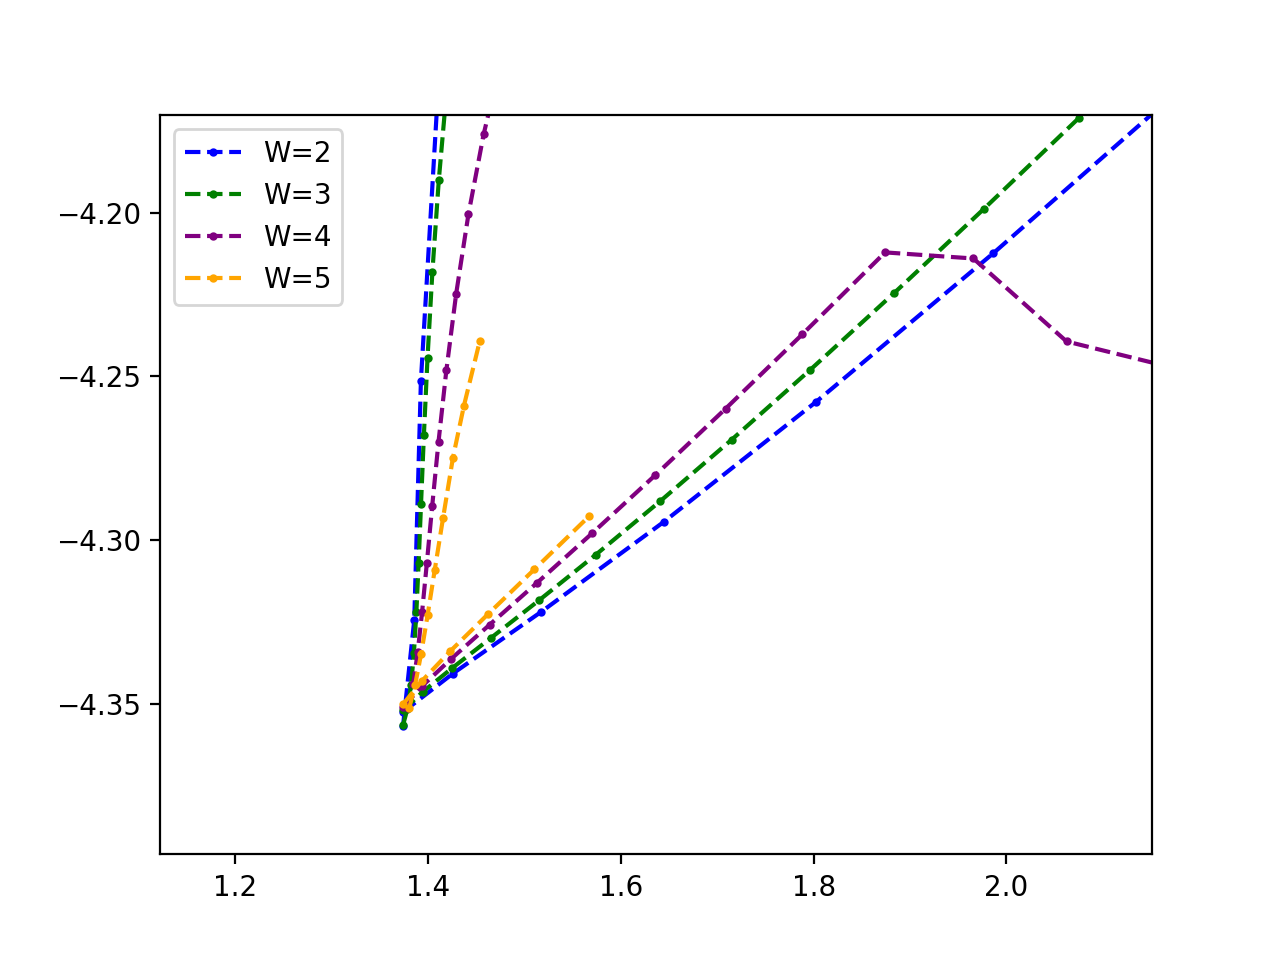

In [54]:
%matplotlib notebook
# plt.figure(figsize=(16, 10))
xscale = 9

plt.plot(h_w2_1, mu_w2_1, 'o--', label='W=2', color='blue', markersize=2)
plt.plot(h_w2_2, mu_w2_2, 'o--', color='blue', markersize=2)

plt.plot(new_h_w3_1, new_mu_w3_1, 'o--', label='W=3', color='green', markersize=2)
plt.plot(new_h_w3_2, new_mu_w3_2, 'o--', color='green', markersize=2)

plt.plot(new_h_w4_1, new_mu_w4_1, 'o--', label='W=4', color='purple', markersize=2)
plt.plot(new_h_w4_2, new_mu_w4_2, 'o--', color='purple', markersize=2)

plt.plot(new_h_w5_1, new_mu_w5_1, 'o--', label='W=5', color='orange', markersize=2)
plt.plot(new_h_w5_2, new_mu_w5_2, 'o--', color='orange', markersize=2)
plt.legend()